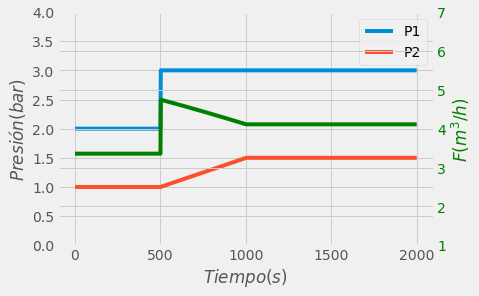

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from SPQentrada import *

#Datos iniciales
p1 = 2
p2 = 1
d_in = 1 
L = 50
dt = 2
fd = 0.03
rho = 1000  #kg/m3

#conversión automática de datos
d_m = d_in * 0.0254
area = np.pi * d_m**2 / 4
cte_raiz = 2 * d_m / (rho * L)

#Datos Escalon P1
t0_e1= 500
A_e1 = 1

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 0
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0.001
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

T = []
P1 = []
P2 = []
V = []
F = []

for i in range(0,1001,1):
    t = i * dt
    T = np.append(T, t)
    p1t = p1 \
    + ESCALON(t0_e1, A_e1, t)\
    + RAMPA(t0_r1, pend1, dt1, t)\
    + ExpDecr(t0_exd1, tau1, A_exd1, t)
    P1 = np.append(P1, p1t)
    
    p2t = p2 \
    + ESCALON(t0_e2, A_e2, t)\
    + RAMPA(t0_r2, pend2, dt2, t)\
    + ExpDecr(t0_exd2, tau2, A_exd2, t)
    P2 = np.append(P2, p2t)
    
    p1_pascal = p1t * 100000
    p2_pascal = p2t * 100000
    
    v = np.sqrt(cte_raiz / fd * (p1_pascal - p2_pascal))
    V = np.append(V, v)
    
    f = v * area
    F = np. append(F, f)

F_m3h= F * 3600

#creacion de tabla df para pandas:
valores = {'tiempo_s':T,
           'p1_bar':P1, 'p2_bar':P2,
           'velc_m/s':V,
           'F_m3/s':F, 'F_m3/h':F_m3h}
columnas = ['tiempo_s', 'p1_bar', 'p2_bar', 'velc_m/s', 'F_m3/s', 'F_m3/h']
df = pd.DataFrame(valores, columns=columnas)

#gráficos
fig, ax1 = plt.subplots()

ax1.plot(T, P1, label="P1")
ax1.plot(T, P2, label="P2")
ax1.set_xlabel('$Tiempo (s)$')
ax1.set_ylabel('$Presión (bar)$')

ax2 = ax1.twinx()
ax2.plot(T, F_m3h, 'g-')
ax2.set_ylabel('$F (m^3/h)$', color='g')
ax2.tick_params('y', colors='g')

#limites en y (Corrección de escala)
ax1.set_ylim(0, 4)
ax2.set_ylim(1, 7)
ax1.legend()


In [49]:
df[(df.tiempo_s == 450) | (df.tiempo_s == 600) | (df.tiempo_s == 1000)]

,tiempo_s,p1_bar,p2_bar,velc_m/s,F_m3/s,F_m3/h
225,450.0,2.0,1.0,1.840290,0.000932,3.356959
300,600.0,3.0,1.1,2.536664,0.001285,4.627249
500,1000.0,3.0,1.5,2.253886,0.001142,4.111418


Buscar un valor específico

In [50]:
valor_buscado = 150
df[df.tiempo_s == valor_buscado]

,tiempo_s,p1_bar,p2_bar,velc_m/s,F_m3/s,F_m3/h
75,150.0,2.0,1.0,1.84029,0.000932,3.356959
